# Machine Vision Lab 10
> Name - Ojas Patil
>
> Register Number - 21BAI1106

> Alternatively, you can find the colab notebook [here](https://colab.research.google.com/drive/1DS2oSvx31J1bK1rAskenXhbWr-mdSj_L?usp=sharing).
>
> And the video being used can be viewed on [gdrive](https://drive.google.com/file/d/1igkSOCgiT5paYbwWOm51YUPs4cKjjmO2/view?usp=sharing) or [YouTube](https://youtu.be/BXPqkGGPLCI?si=9qxPI0MSHH3Z26u7).

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Load Video

In [52]:
video_path = '/content/mv_demo_2.mkv'
cap = cv2.VideoCapture(video_path)

# Check if the video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
else:
    print("Video successfully loaded.")

fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"Video FPS: {fps}, Total Frames: {frame_count}")

Video successfully loaded.
Video FPS: 30.0, Total Frames: 413


### Motion Estimation using Frame Differencing


In [53]:
ret, prev_frame = cap.read()
prev_frame_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
motion_frames = []
frame_diffs = []

In [54]:
while cap.isOpened():
    ret, curr_frame = cap.read()
    if not ret:
        break

    # Convert the current frame to grayscale
    curr_frame_gray = cv2.cvtColor(curr_frame, cv2.COLOR_BGR2GRAY)

    # Compute histogram difference between the previous and current frame
    hist_prev = cv2.calcHist([prev_frame_gray], [0], None, [256], [0, 256])
    hist_curr = cv2.calcHist([curr_frame_gray], [0], None, [256], [0, 256])
    hist_diff = cv2.compareHist(hist_prev, hist_curr, cv2.HISTCMP_CORREL)

    # Calculate frame difference and threshold it
    frame_diff = cv2.absdiff(prev_frame_gray, curr_frame_gray)
    _, thresh = cv2.threshold(frame_diff, 30, 255, cv2.THRESH_BINARY)  # Threshold chosen for motion sensitivity

    if hist_diff < 0.85:  # Threshold for histogram difference indicating motion (adjustable)
        motion_frames.append((cap.get(cv2.CAP_PROP_POS_FRAMES), curr_frame.copy()))
        frame_diffs.append(hist_diff)

    # Update the previous frame for the next iteration
    prev_frame_gray = curr_frame_gray

cap.release()
print("Motion estimation completed.")


Motion estimation completed.


### Event Detection based on Motion Intensity

In [55]:
# Define criteria for a significant event based on histogram difference
event_threshold = 0.6  # Adjust to control sensitivity for event detection

# List to store frames where significant events were detected
event_frames = []

for i, (frame_idx, frame) in enumerate(motion_frames):
    if frame_diffs[i] < event_threshold:
        # Mark the event by drawing a rectangle around the motion areas
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        _, thresh = cv2.threshold(gray_frame, 30, 255, cv2.THRESH_BINARY)

        # Find contours of the moving regions
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            if cv2.contourArea(contour) > 500:  # Filter small regions
                x, y, w, h = cv2.boundingRect(contour)
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Append annotated frame as an event frame
        event_frames.append((frame_idx / fps, frame))  # Store timestamp and frame

print("Event detection completed.")


Event detection completed.


### Visualize Motion and Annotate Events

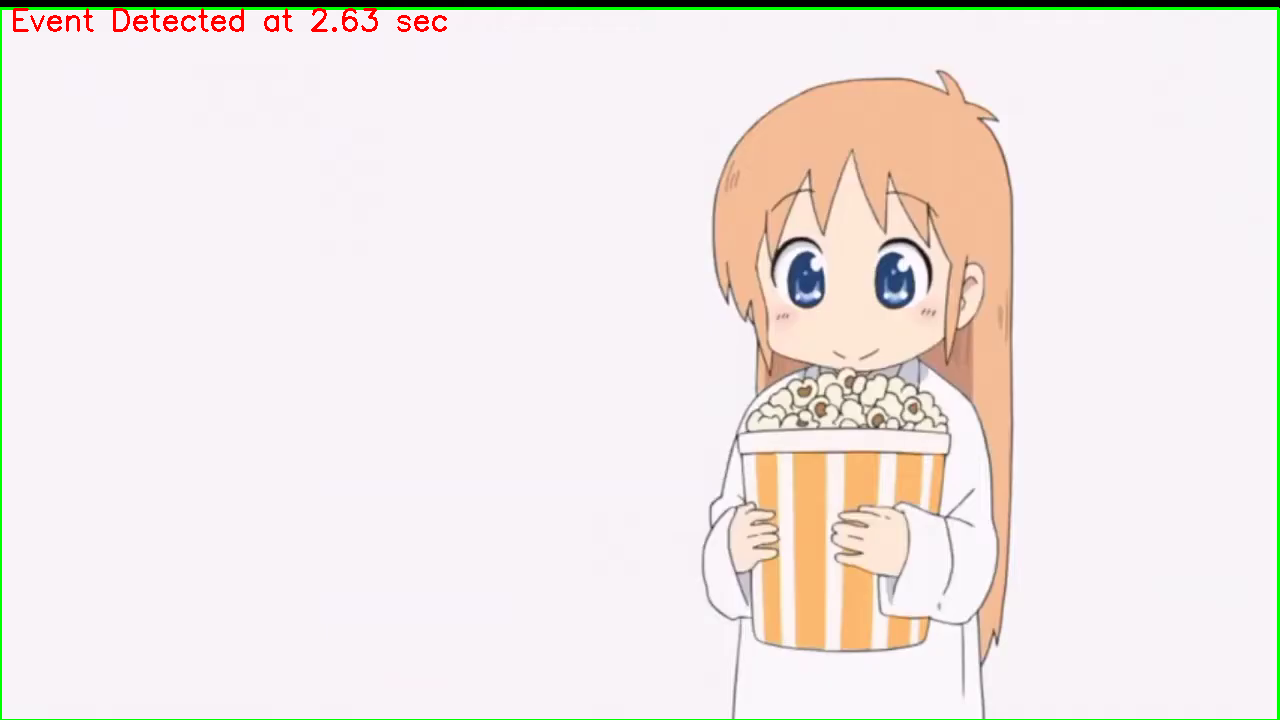

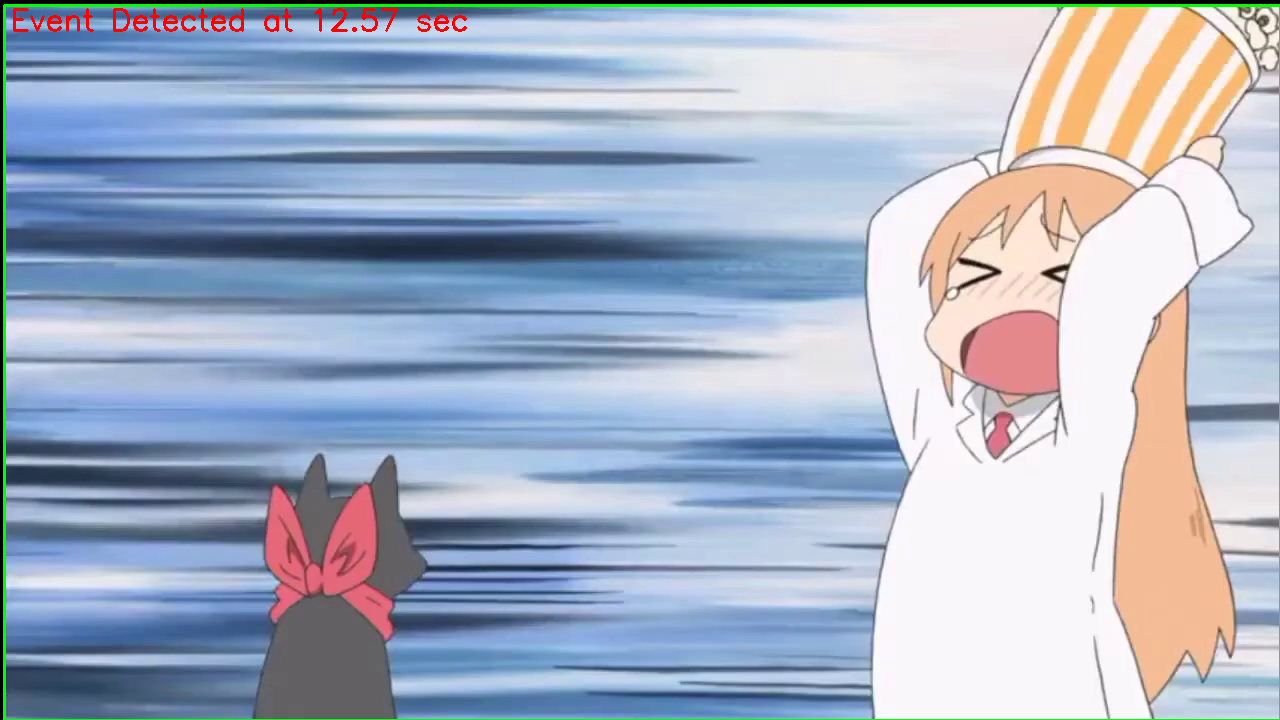

Visualization of events completed.


In [56]:
from google.colab.patches import cv2_imshow
for timestamp, event_frame in event_frames:
    cv2.putText(event_frame, f"Event Detected at {timestamp:.2f} sec", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    cv2_imshow(event_frame)

print("Visualization of events completed.")